# EDA

In [1]:
#EDA : Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations.

In [2]:
#let's import the important libraries

import pandas as pd
import numpy as np

In [3]:
#we have a dataset 'bank_EDA.csv'
#let's create it's DataFrame
bd = pd.read_csv('bank_EDA.csv',sep=';')

In [4]:
#let's check the head of the DataFrame

In [5]:
bd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
##Let's Explore the data
#column contact
#all the variables in the column contact are:
bd['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [7]:
#let's check the list of the columns
bd.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [8]:
# let's check if we have any nan data
bd.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#so there is no blank cell

In [10]:
#let's check the type of data in each cell
bd.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Visualization

In [11]:
#let's import some visualization libraries
import pandas as pd
import seaborn as sns

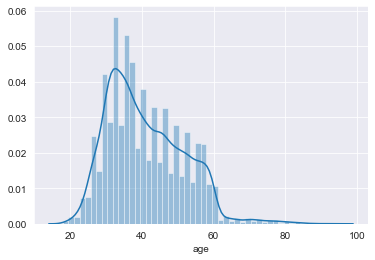

In [12]:
#let's see the distribution of age 
sns.set_style('darkgrid')  #just to make our graph look better
sns.distplot(bd['age'],kde=True) #kde stands for kernel density estimation
# for more info about kde : https://en.wikipedia.org/wiki/Kernel_density_estimation

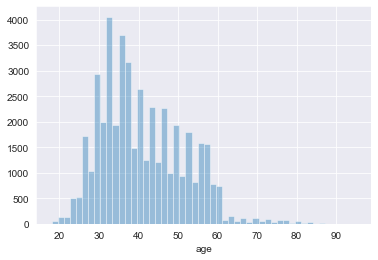

In [13]:
sns.distplot(bd['age'],kde=False) #just see the difference

In [14]:
#let's check the stats of the age column such as min, max, mean etc.
print("Minimum age in the data is:",bd.age.min())
print("Maximum age in the data is:",bd.age.max())
print("Range of age is from {} to {}, value is {}".format(bd['age'].min(),bd['age'].max(),bd['age'].max()-bd['age'].min()))


Minimum age in the data is: 18
Maximum age in the data is: 95
Range of age is from 18 to 95, value is 77


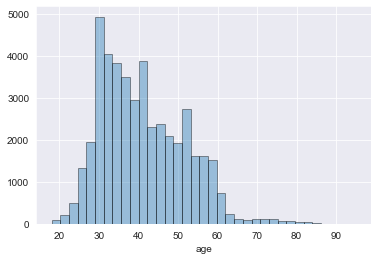

In [15]:
sns.distplot(bd['age'],kde=False,hist=True,bins=35,hist_kws=dict(edgecolor="k", linewidth=1))

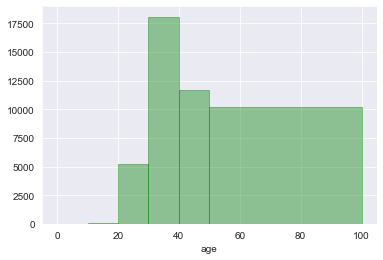

In [16]:
# we can chose the bins manually
sns.distplot(bd['age'],kde=False,bins=[0, 10, 20, 30, 40, 50, 100],hist_kws=dict(edgecolor="g", linewidth=1),color='Green')

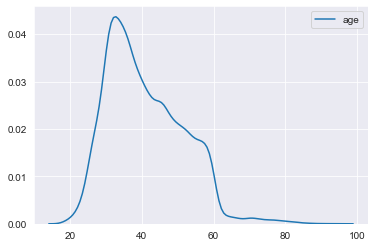

In [17]:
#to just plot the kde

sns.kdeplot(bd['age'])

In [18]:
#to save the plot:
#plt.savefig('name.png') this will be be saved to the same directory where the .ipynb file is.

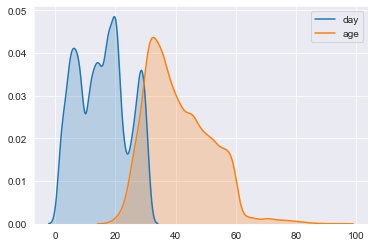

In [20]:
#let's check the kde plots of age and day
sns.kdeplot(bd['day'],shade=True) #shade highlights the area under the graph
sns.kdeplot(bd['age'],shade=True) 

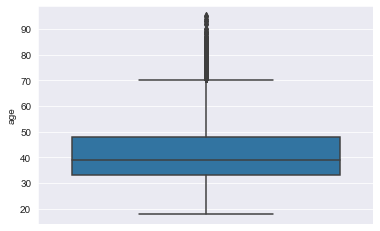

In [24]:
#Box plots 

#box plots is a good way to determine the outliers in data

sns.boxplot(y='age',data=bd)

In [25]:
# to see the .25 quartile of the data 

Q1 = bd['age'].quantile(.25)
Q3 = bd['age'].quantile(.75)

IQR = Q3 - Q1 #(Inter Quartile Range)

print("Q1 Value:",Q1)
print("Median Value:",bd.age.median())
print("Q3 Value:",Q3)
print("Upper whisker limit:",(Q3 + 1.5*IQR))
print("Lowerr whisker limit:",(Q1 - 1.5*IQR))

Q1 Value: 33.0
Median Value: 39.0
Q3 Value: 48.0
Upper whisker limit: 70.5
Lowerr whisker limit: 10.5


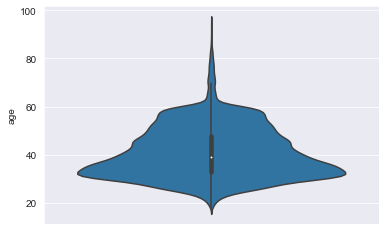

In [27]:
#Violin plot is another interactive way to see the spread of data

sns.violinplot(y = bd['age'])

In [28]:
#bivariate plots

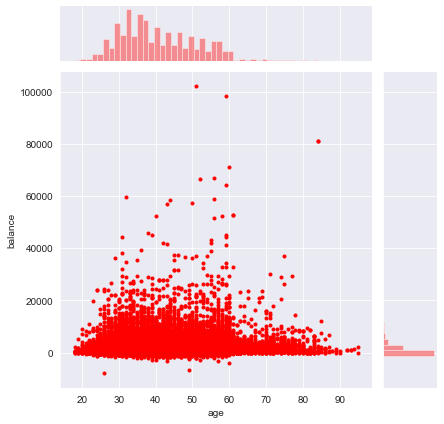

In [29]:
sns.jointplot(x='age',y='balance',data=bd,color='red',s=9)

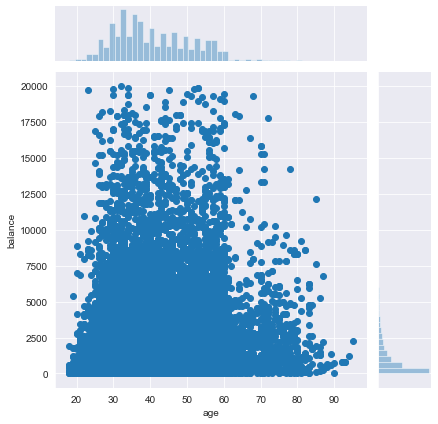

In [30]:
#let's set the limit to the balance

sns.jointplot(x='age',y='balance',data=bd[(bd['balance']>0)&(bd['balance']<20000)])

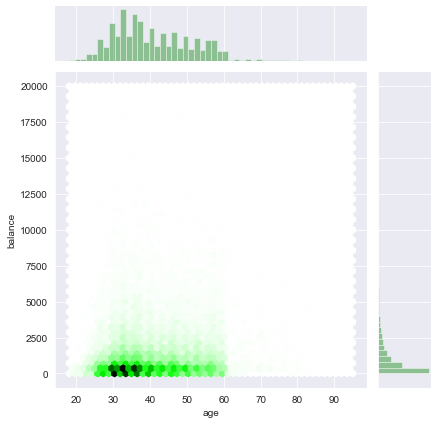

In [32]:
#let's change the markers

sns.jointplot(x='age',y='balance',data=bd[(bd['balance']>0)&(bd['balance']<20000)],kind='hex',color='g')

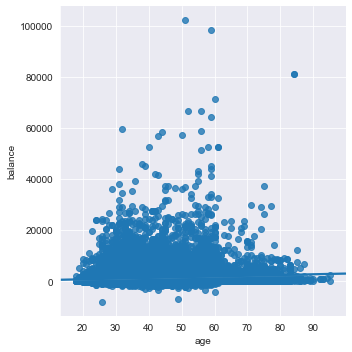

In [33]:
#to get the plot with best fitting line

sns.lmplot('age','balance',data=bd,order=1)

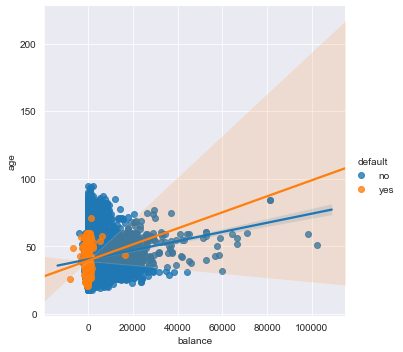

In [34]:
# now we can plot the data based of the class it belongs to 

sns.lmplot('balance','age',data=bd,hue='default') #hue is the class based of which we need to split the data

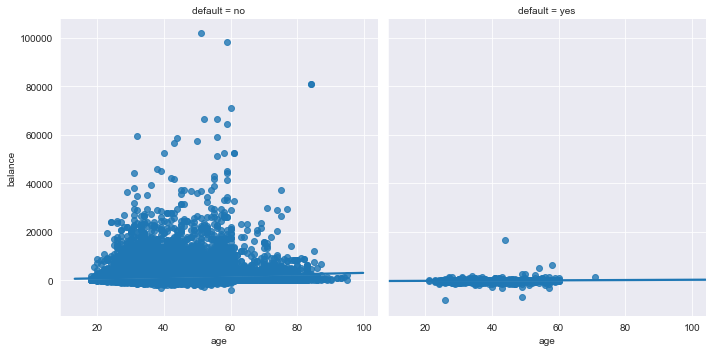

In [35]:
# to plot them on seperate curve use col

sns.lmplot('age','balance',data=bd,col='default') 

# Categorical Data

In [36]:
# education column

bd['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

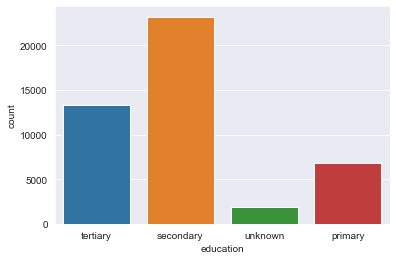

In [37]:
#let's plot the countplot
sns.countplot(bd['education'])

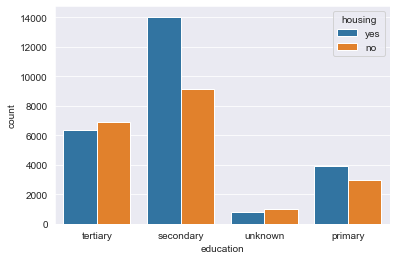

In [38]:
# let's classify further on the basis of the housing

sns.countplot(bd['education'],hue=bd['housing'])

# Heatmaps and Correlation

In [39]:
# Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

# 1 indicates a strong positive relationship. -1 indicates a strong negative relationship. A result of zero indicates no relationship at all.

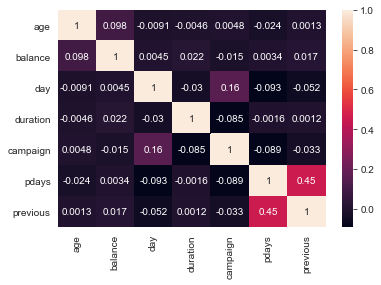

In [40]:
sns.heatmap(bd.corr(),annot=True)

In [41]:
# to get plot of all possible numerical features 

#sns.pairplot(bd)

#Thanks